In [1]:
from IPython.display import display

from piltext import FontManager, ImageDrawer, TextGrid

In [2]:
f = FontManager(default_font_size=20)
# f.delete_all_fonts()
font1 = f.download_google_font("ofl", "roboto", "Roboto[wdth,wght].ttf")
font2 = f.download_google_font("ofl", "jersey10", "Jersey10-Regular.ttf")
f.default_font_name = font1
print(f.list_available_fonts())

['Roboto[wdth,wght]', 'Jersey10-Regular']


In [3]:
print(f.get_variation_names())

[b'Thin', b'ExtraLight', b'Light', b'Regular', b'Medium', b'SemiBold', b'Bold', b'ExtraBold', b'Black', b'Condensed Thin', b'Condensed ExtraLight', b'Condensed Light', b'Condensed Regular', b'Condensed Medium', b'Condensed SemiBold', b'Condensed Bold', b'Condensed ExtraBold', b'Condensed Black']


w: 82, h:45, font_size: 48


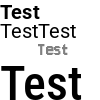

In [4]:
image = ImageDrawer(100, 100, f)
xy = (0, 0)
w, h, font_size = image.draw_text("Test", xy, font_variation="Bold")
xy = (xy[0], xy[1] + h)
w, h, font_size = image.draw_text("Test", xy)
xy = (xy[0] + w, xy[1])
w, h, font_size = image.draw_text("Test", xy)
xy = (xy[0], xy[1] + h)
w, h, font_size = image.draw_text("Test", xy, font_name=font2, fill=128)
xy = (0, xy[1] + h)
w, h, font_size = image.draw_text(
    "Test", xy, end=(100, 100), font_variation="Condensed Medium"
)
print(f"w: {w}, h:{h}, font_size: {font_size}")

image.finalize(inverted=False)
display(image.get_image())

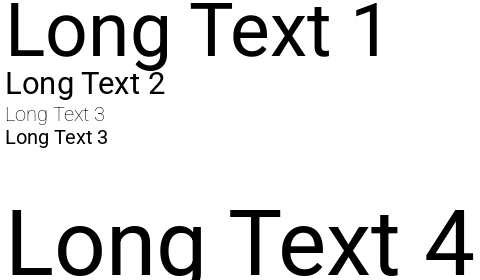

In [5]:
image = ImageDrawer(480, 280, f)
xy = (5, 3)
w, h, font_size = image.draw_text(
    "Long Text 1", xy, end=(480, (280 - 15) / 3), anchor="lt"
)
xy = (5, int(h * 0.85))
w, h, font_size = image.draw_text(
    "Long Text 2", xy, end=(480, xy[1] * 1.5), anchor="lt"
)
xy = (5, xy[1] + h)
w, h, font_size = image.draw_text(
    "Long Text 3", xy, font_size=font_size, font_variation="Thin", anchor="lt"
)
xy = (5, xy[1] + h)
w, h, font_size = image.draw_text("Long Text 3", xy, font_size=font_size, anchor="lt")
w, h, font_size = image.draw_text(
    "Long Text 4", (480 - 5, 280 - 5), end=(5, 5), anchor="rs"
)

image.finalize(inverted=False)
display(image.get_image())

In [6]:
f.list_available_fonts()

['Roboto[wdth,wght]', 'Jersey10-Regular']

In [7]:
image = ImageDrawer(480, 280, f)

grid = TextGrid(7, 4, image, margin_x=2, margin_y=2)
grid.print_grid()
merge_list = [
    ((0, 0), (0, 3)),
    ((1, 0), (2, 1)),
    ((1, 2), (2, 3)),
    ((3, 0), (6, 3)),
]
grid.merge_bulk(merge_list)
grid.print_grid()


Grid Layout:
  0 1 2 3
---------
0|. . . .
1|. . . .
2|. . . .
3|. . . .
4|. . . .
5|. . . .
6|. . . .

Grid Layout:
  0 1 2 3
---------
0|0 . . 0
1|1 . 2 .
2|. 1 . 2
3|3 . . .
4|. . . .
5|. . . .
6|. . . 3


In [8]:
grid.get_merged_cells()

{(0, 0): ((0, 0), (0, 3)),
 (1, 0): ((1, 0), (2, 1)),
 (1, 2): ((1, 2), (2, 3)),
 (3, 0): ((3, 0), (6, 3))}

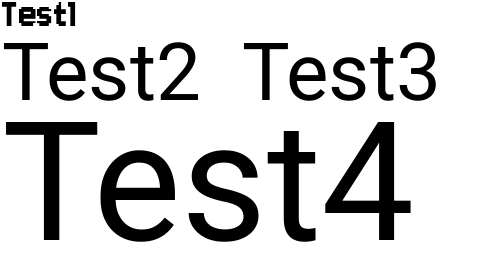

In [9]:
image.initialize()
grid.set_text(0, "Test1", font_name=font2)
grid.set_text(1, "Test2")
grid.set_text(2, "Test3")
grid.set_text(3, "Test4", anchor="lt")
image.finalize(inverted=False)
display(image.get_image())

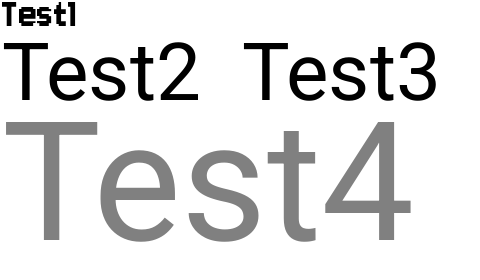

In [10]:
image.initialize()
text_list = [
    {"start": 0, "text": "Test1", "font_name": font2},
    {"start": 1, "text": "Test2"},
    {"start": 2, "text": "Test3"},
    {"start": 3, "text": "Test4", "anchor": "lt", "fill": 128},
]
grid.set_text_list(text_list)
image.finalize(inverted=False)
display(image.get_image())

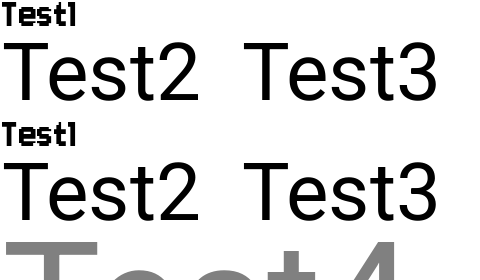

In [12]:
img = image.get_image().copy()
image.initialize()
grid.set_text(0, "Test1", font_name=font2)
grid.set_text(1, "Test2")
grid.set_text(2, "Test3")
grid.paste_image(3, img, anchor="ls")
image.finalize(inverted=False)
display(image.get_image())